# Lab2b Cone Detection (color based)
**Challenges**
- Glossy finished 
- Light Change
- Color Variance
- camera noise


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

**RGB COLOR SPACE**

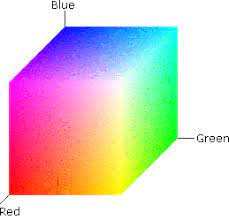


**HSV COLOR SPACE**

- [wiki.ColorSpace](https://en.wikipedia.org/wiki/HSL_and_HSV)
- [opencv document HSV](https://docs.opencv.org/3.4/df/d9d/tutorial_py_colorspaces.html#:~:text=For%20HSV%2C%20hue%20range%20is,Different%20software%20use%20different%20scales.)

![hsv color space](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQdA-dmLCm1uCES_jDzAVcvONqvSvd9PyMSxQ&usqp=CAU)

>The HSV color space (hue, saturation, value) is often used by people who are selecting colors (e.g., of paints or inks) from a color wheel or palette, because it corresponds better to how people experience color than the RGB color space does.

In [2]:
# Constants
ORANGE = ([0, 135, 135], [15, 255, 255])
KERNEL = (5,5)

**Notes**

- cv2.imread() will read image in BGR order. 
- matplotlib.pyplot.imshow() expected image in RGB order.


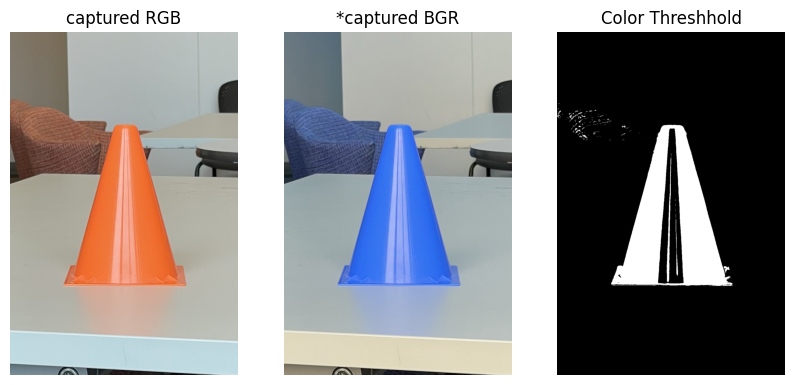

In [3]:
image_path = '../data/IMG_5572.jpeg'
img = cv2.imread(image_path)
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_thresh = cv2.inRange(img_HSV, np.array(ORANGE[0]), np.array(ORANGE[1]))


fig, axs = plt.subplots(1, 3, figsize=(10,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].title.set_text("captured RGB")
axs[1].imshow(img)
axs[1].title.set_text("*captured BGR")
axs[2].imshow(img_thresh, cmap='gray')
axs[2].title.set_text("Color Threshhold")
# disable axis
for ax in axs:
    ax.axis('off')
plt.show()


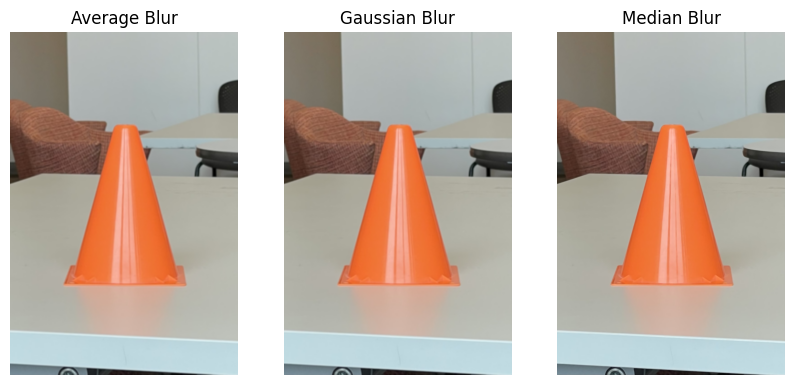

In [4]:
median_blur = cv2.medianBlur(img,7)
gaussian_blur = cv2.GaussianBlur(img,(7,7), cv2.BORDER_DEFAULT)
avg_blur = cv2.blur(img,(7,7)) 

fig, axs = plt.subplots(1, 3, figsize=(10,10))
axs[0].imshow(cv2.cvtColor(avg_blur, cv2.COLOR_BGR2RGB))
axs[0].title.set_text("Average Blur")
axs[1].imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
axs[1].title.set_text("Gaussian Blur")
axs[2].imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
axs[2].title.set_text("Median Blur")
# disable axis
for ax in axs:
    ax.axis('off')
plt.show()


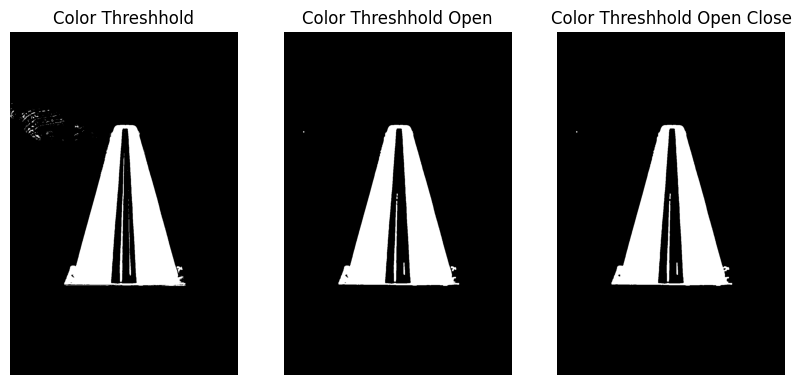

In [5]:
kernel = np.ones((5, 5))
img_thresh_open = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel)
img_thresh_open_close = cv2.morphologyEx(img_thresh_open, cv2.MORPH_CLOSE, kernel)

fig, axs = plt.subplots(1, 3, figsize=(10,10))
axs[0].imshow(img_thresh, cmap='gray')
axs[0].title.set_text("Color Threshhold")
axs[1].imshow(img_thresh_open, cmap='gray')
axs[1].title.set_text("Color Threshhold Open")
axs[2].imshow(img_thresh_open_close, cmap='gray')
axs[2].title.set_text("Color Threshhold Open Close")
# disable axis
for ax in axs:
    ax.axis('off')
plt.show()

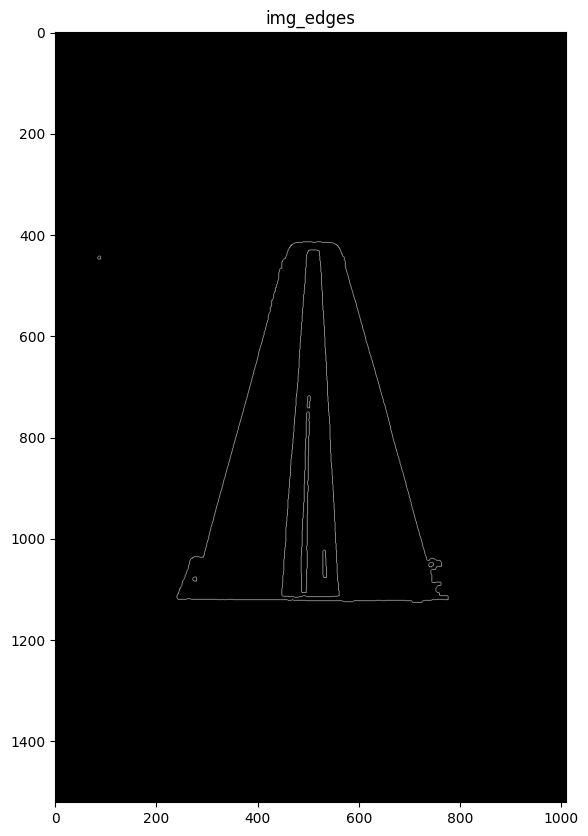

In [6]:
img_edges = cv2.Canny(img_thresh_open_close, 80, 160)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(img_edges, cmap='gray')
ax.title.set_text("img_edges")
# disable axis
for ax in axs:
    ax.axis('off')
plt.show()

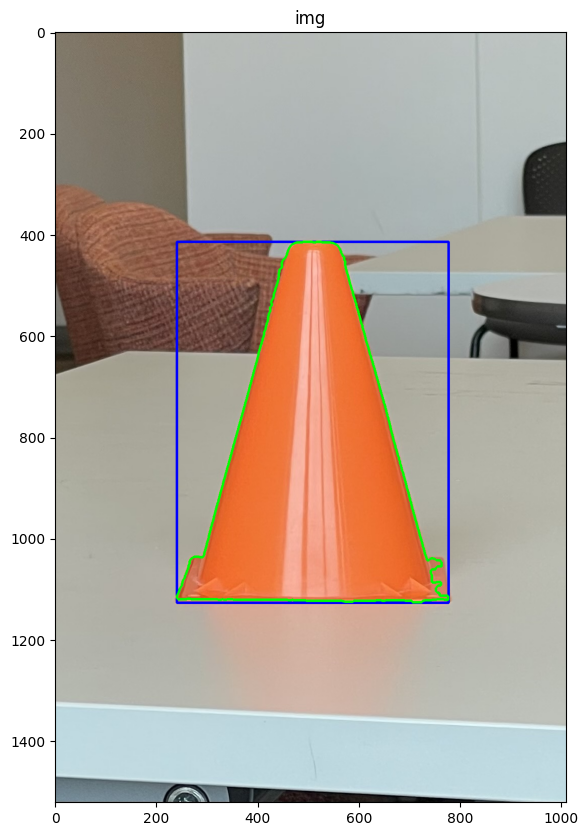

The area of rectangular box : 382168


In [11]:
contours, hierarchy= cv2.findContours(img_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# -> find largest contour area
largest = 0
largest_idx = 0
for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    if area > largest:
        largest = area
        largest_idx = i

x,y,w,h = cv2.boundingRect(contours[largest_idx])
cv2.rectangle(RGB_img,(x,y),(x+w,y+h),(0, 0, 255),3)
cv2.drawContours(RGB_img, [contours[largest_idx]], -1, (0, 255, 0), 3)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(RGB_img)
ax.title.set_text("img")

# disable axis
for ax in axs:
    ax.axis('off')
plt.show()

print(f"The area of rectangular box : {w*h}")